In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import random
import sys
sys.path.append('..')
from capacity_management.src.cost_simulation import CostSimulator
from capacity_management.src.greedy_set_capacity import greedy_set_capacity

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
co = 10
cu = 1
iters=10000
p = 0.15
n = 4
true_caps = np.array([100]*n)

In [40]:
cs = CostSimulator(co, cu, iters, p, true_caps)

In [43]:
# initialize inflated capacities to true capacities
qhat = true_caps.copy()

np.random.seed(0)
random.seed(0)

cs.simulate_multi_school_costs(qhat)
curr_cost = cs.costs.sum()
cost_history = []
adding_to = []

niter = 0
while niter < 80:
    new_costs = np.empty(n)
    for i in range(n):
        cs.simulate_multi_school_costs(
            qhat + np.array([1 if j == i else 0 for j in range(n)])
        )
        new_costs[i] = cs.costs.sum()

#     if (curr_cost - new_costs < 0).all():
#         break

    i = np.argmax(curr_cost - new_costs)
    qhat[i] += 1
    curr_cost = new_costs[i]
    cost_history.append(curr_cost)
    adding_to.append(i)
    niter +=1


print("Inflated capacities found by our Greedy algorithm are " + str(qhat))
print("Associated cost is: " + str(curr_cost))

Inflated capacities found by our Greedy algorithm are [115 121 121 123]
Associated cost is: 92.60589999999999


In [38]:
hist3plus = cost_history

In [28]:
hist4 = cost_history

In [13]:
hist3 = cost_history

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

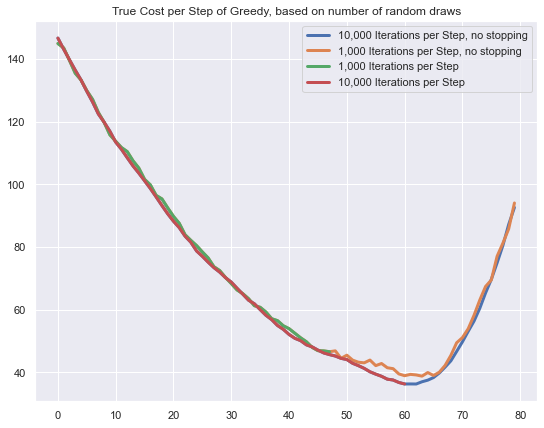

In [42]:

plt.figure(figsize=(9,7))
plt.plot(cost_history, lw=3, label='10,000 Iterations per Step, no stopping')
plt.plot(hist3plus, lw=3, label='1,000 Iterations per Step, no stopping')
plt.plot(hist3, lw=3, label='1,000 Iterations per Step')
plt.plot(hist4, lw=3, label='10,000 Iterations per Step')
plt.legend()
plt.title('True Cost per Step of Greedy, based on number of random draws')
plt.savefig("/Users/katherinementzer/Desktop/greedy_convergence.png")

In [47]:
from matplotlib import cm

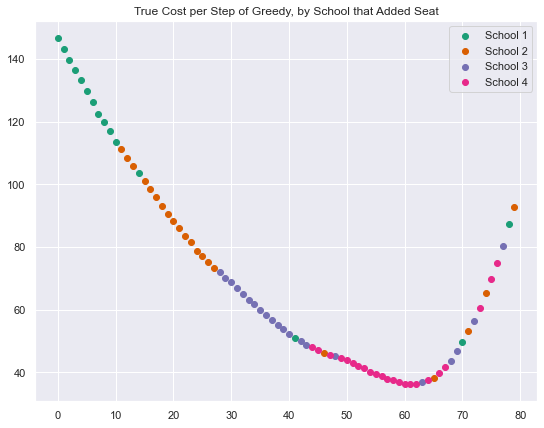

In [63]:
cmap = cm.get_cmap('Dark2')
colors = [cmap(i) for i in adding_to]
plt.figure(figsize=(9,7))
for i in range(4):
    y = [cost_history[j] for j in range(len(cost_history)) if adding_to[j] == i] 
    x = [j for j in range(len(cost_history)) if adding_to[j] == i] 
    plt.scatter(x,y, color=cmap(i), label=f"School {i+1}")
plt.legend()
plt.title('True Cost per Step of Greedy, by School that Added Seat')
plt.savefig("/Users/katherinementzer/Desktop/greedy_convergence.png")